In [1]:
%matplotlib widget
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import cvxpy as cp
from scipy.integrate import solve_ivp

from matplotlib import colors

colors_ = ["blue", "red", "green", "gray", "black"]

34450
/media/work/docs/codes/QuCF/scripts-py


In [3]:
for i in range(100):
    plt.close()

(2, 10001)
(2, 10001)


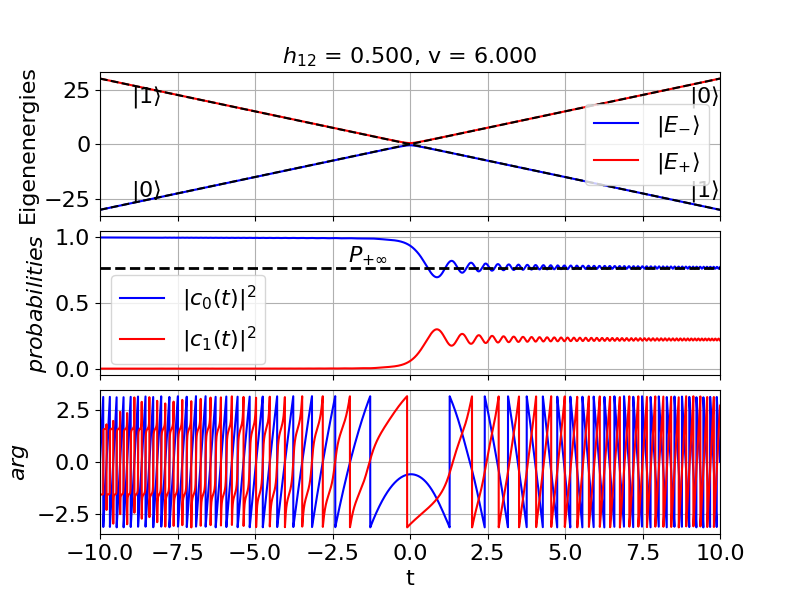

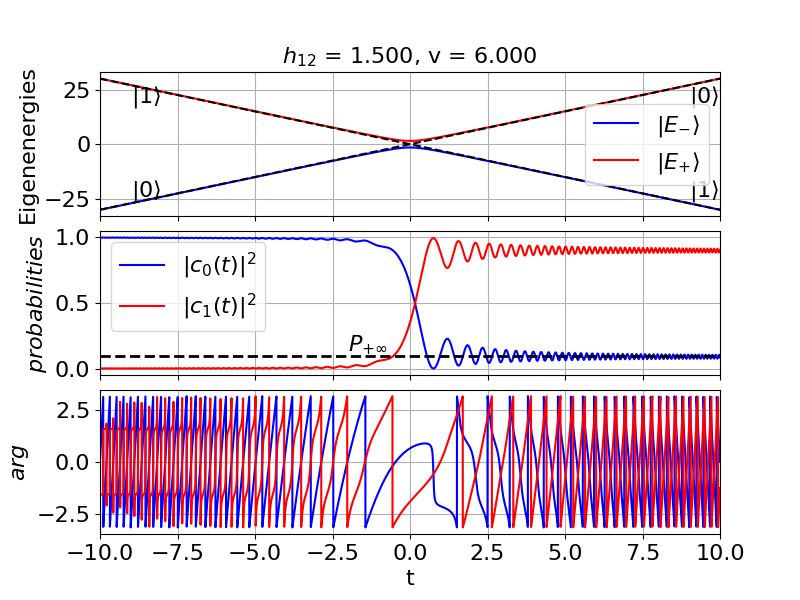

In [12]:
import cmath

# ------------------------------------------------------------
def compute_eig(H):
    eigVals, eigVecs = np.linalg.eig(H)

    eigVals_sorted = np.sort(eigVals)
    ids_sort = np.argsort(eigVals)

    eigVecs_sorted = eigVecs[:,ids_sort]

    return eigVals_sorted, eigVecs_sorted
# ------------------------------------------------------------
def plot_energies_and_coefs(t, E, E_ref, t_prob, probs, phases, gap, v, Pa):
    fontsize = 16

    fig, axs = plt.subplots(3, 1)
    fig.set_size_inches(8, 6)
    plt.subplots_adjust(hspace=0.1)

    # --- eigenenergies ---
    ax = axs[0]
    ax.plot(t, E[0,:], "-b", label = "$|E_{-}\\rangle$")
    ax.plot(t, E[1,:], "-r", label = "$|E_{+}\\rangle$")
    ax.plot(t, E_ref(t), '--', color = "black")
    ax.plot(t, -E_ref(t), '--', color = "black")
    ax.set_ylabel("Eigenenergies", fontsize = fontsize)
    ax.set_title("$h_{12}$" + " = {:0.3f}, v = {:0.3f}".format(gap, v), fontsize = fontsize)
    ax.set_xlim(t[0], t[-1])
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.set_xticklabels([])
    ax.grid()
    ax.legend(fontsize = fontsize)


    x_ket = 0.9 * t[-1]
    y_ket = v * t[-1] / 2. * 0.8

    ax.text(-x_ket,  y_ket * 0.8, "$|1\\rangle$", fontsize = fontsize)
    ax.text( x_ket, -y_ket, "$|1\\rangle$", fontsize = fontsize)

    ax.text(-x_ket, -y_ket, "$|0\\rangle$", fontsize = fontsize)
    ax.text( x_ket,  y_ket * 0.8, "$|0\\rangle$", fontsize = fontsize)

    # --- porbabilities ---
    ax = axs[1]
    ax.plot(t_prob, probs[0,:], "-b", label = '$|c_0(t)|^2$')
    ax.plot(t_prob, probs[1,:], "-r", label = '$|c_1(t)|^2$')
    ax.set_xlabel("t", fontsize = fontsize)
    ax.set_ylabel("$probabilities$", fontsize = fontsize)
    ax.set_xlim(t[0], t[-1])
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.grid()
    ax.legend(fontsize = fontsize)

    ax.axhline(y=Pa, color='black', linestyle='--', linewidth=2, label="$P_{+\\infty}$")
    ax.text(-2, Pa+0.04, "$P_{+\\infty}$", fontsize = fontsize)

    ax.set_xticklabels([])

    # --- phases ---
    ax = axs[2]
    ax.plot(t_prob, phases[0,:], "-b", label = '$arg(c_0(t))$')
    ax.plot(t_prob, phases[1,:], "-r", label = '$arg(c_1(t))$')
    ax.set_xlabel("t", fontsize = fontsize)
    ax.set_ylabel("$arg$", fontsize = fontsize)
    ax.set_xlim(t[0], t[-1])
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.grid()
    return
# ------------------------------------------------------------
def analyse_Landau_Zener_effect(v, gap):
    E_ref = lambda t: v*t/2.

    ham = lambda t: np.array([
            [E_ref(t),      gap],
            [gap,     -E_ref(t)]
        ])
    
    schrodinger_eq = lambda t, psi: - 1.j * np.dot(ham(t), psi)

    t_max, Nt = 10., 10001
    t = np.linspace(-t_max, t_max, Nt)

    # --- analytical probability at +\infty ---
    Pa = np.exp(- np.pi * np.abs(gap)**2 / (v/2.))

    # --- compute eigenenergies ---
    E = np.zeros([2, Nt])
    for count_t in range(Nt):
        t1 = t[count_t]
        E[:, count_t], _ = compute_eig(ham(t1))

    # --- Compute probabilities of |0> and |1> states ---
    psi_init = np.array([1.0, 0.0], dtype=complex)

    sol = solve_ivp(
        schrodinger_eq, 
        [t[0], t[-1]], 
        psi_init, 
        t_eval=t,
        method = 'RK45'
    )
    # mix.print_matrix(sol.y, ff=[22, 3, "e"])

    probs = np.abs(sol.y)**2

    phases = np.array([[cmath.phase(y1t) for y1t in y1] for y1 in sol.y])
    print(phases.shape)


    # # --- Plotting ---
    plot_energies_and_coefs(t, E, E_ref, sol.t, probs, phases, gap, v, Pa)
    return
# ------------------------------------------------------------
analyse_Landau_Zener_effect(v = 6.0, gap = 0.5)
analyse_Landau_Zener_effect(v = 6.0, gap = 1.5)

In [ ]:
# def compute_eig(H):
#     eigVals, eigVecs = np.linalg.eig(H)

#     eigVals_sorted = np.sort(eigVals)
#     ids_sort = np.argsort(eigVals)

#     eigVecs_sorted = eigVecs[:,ids_sort]

#     return eigVals_sorted, eigVecs_sorted
# # ------------------------------------------------------------
# def plot_energies_and_coefs(q, E, E_ref, Coefs, gap, v):
#     fontsize = 16

#     fig, axs = plt.subplots(2, 1)
#     fig.set_size_inches(8, 6)
#     plt.subplots_adjust(hspace=0.1)

#     ax = axs[0]
#     ax.plot(q, E[0,:], "-b", label = 'E0')
#     ax.plot(q, E[1,:], "-r", label = 'E1')
#     ax.plot(q, E_ref, '--', color = "black", label = 'E-unpert')
#     ax.plot(q, -E_ref, '--', color = "black")
#     ax.set_ylabel("Eigenenergies", fontsize = fontsize)
#     ax.set_title("Gap = {:0.3f}, v = {:0.3f}".format(gap, v), fontsize = fontsize)
#     ax.set_xlim(q[0], q[-1])
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.set_xticklabels([])
#     ax.grid()
#     ax.legend(fontsize = fontsize)

#     ax = axs[1]
#     ax.plot(q, np.abs(Coefs[0,:])**2, "-b", label = 'C0')
#     ax.plot(q, np.abs(Coefs[1,:])**2, "-r", label = 'C1')
#     ax.set_xlabel("q", fontsize = fontsize)
#     ax.set_ylabel("$|C|^2$", fontsize = fontsize)
#     ax.set_xlim(q[0], q[-1])
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.grid()
#     ax.legend(fontsize = fontsize)
#     return
# # ------------------------------------------------------------
# def analyse_Landau_Zener_effect(v, gap):
#     q_max = 10.
#     t_max, Nt = 1., 101

#     t = np.linspace(0, t_max, Nt)

#     q = -q_max + t * 2. * q_max / t_max

#     E_ref = np.zeros(Nt)
#     E = np.zeros([2, Nt])
#     Coefs = np.zeros([2, Nt])
#     for count_t in range(Nt):
#         q1 = q[count_t]

#         E_ref[count_t] = v*q1/2.

#         H = np.array([
#             [E_ref[count_t], gap],
#             [gap,            -E_ref[count_t]]
#         ])

#         E[:, count_t], eigs = compute_eig(H)

#         Coefs[:, count_t] = np.linalg.solve(eigs, np.array([1., 0.]))

#     # --- Plotting ---
#     plot_energies_and_coefs(q, E, E_ref, Coefs, gap, v)
#     return
# # ------------------------------------------------------------
# analyse_Landau_Zener_effect(v = 1.0, gap = 1.0)

# analyse_Landau_Zener_effect(v = 1.0, gap = 10.)

# # analyse_Landau_Zener_effect(v = 0.1, gap = 1.0)